In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# Importing the dataset
bank=pd.read_csv('bank-full.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,38,blue-collar,single,tertiary,no,797,yes,no,unknown,11,jun,124,4,-1,0,unknown,no
10238,32,technician,divorced,secondary,no,2,yes,no,unknown,11,jun,354,17,-1,0,unknown,no
10239,57,admin.,married,secondary,no,5888,no,yes,unknown,11,jun,288,3,-1,0,unknown,no
10240,41,self-employed,single,tertiary,no,1755,no,no,unknown,11,jun,152,10,-1,0,unknown,no


# EDA

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10242 non-null  int64 
 1   job        10242 non-null  object
 2   marital    10242 non-null  object
 3   education  10242 non-null  object
 4   default    10242 non-null  object
 5   balance    10242 non-null  int64 
 6   housing    10242 non-null  object
 7   loan       10242 non-null  object
 8   contact    10242 non-null  object
 9   day        10242 non-null  int64 
 10  month      10242 non-null  object
 11  duration   10242 non-null  int64 
 12  campaign   10242 non-null  int64 
 13  pdays      10242 non-null  int64 
 14  previous   10242 non-null  int64 
 15  poutcome   10242 non-null  object
 16  y          10242 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.3+ MB


In [ ]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_unknown,poutcome_unknown,month_jun,month_may
0,58,no,2143,yes,no,5,261,1,-1,0,...,1,0,0,0,1,0,1,1,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,1,0,1,0,0,1,1,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,1,0,0,1,0,0,1,1,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,1,0,0,0,0,1,1,1,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,1,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,38,no,797,yes,no,11,124,4,-1,0,...,0,1,0,0,1,0,1,1,1,0
10238,32,no,2,yes,no,11,354,17,-1,0,...,0,0,0,1,0,0,1,1,1,0
10239,57,no,5888,no,yes,11,288,3,-1,0,...,1,0,0,1,0,0,1,1,1,0
10240,41,no,1755,no,no,11,152,10,-1,0,...,0,1,0,0,1,0,1,1,1,0


In [ ]:
# To see all columns
pd.set_option("display.max.columns", None)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_unknown,poutcome_unknown,month_jun,month_may
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,38,no,797,yes,no,11,124,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0
10238,32,no,2,yes,no,11,354,17,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1,0
10239,57,no,5888,no,yes,11,288,3,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0
10240,41,no,1755,no,no,11,152,10,-1,0,no,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  10242 non-null  int64 
 1   default              10242 non-null  object
 2   balance              10242 non-null  int64 
 3   housing              10242 non-null  object
 4   loan                 10242 non-null  object
 5   day                  10242 non-null  int64 
 6   duration             10242 non-null  int64 
 7   campaign             10242 non-null  int64 
 8   pdays                10242 non-null  int64 
 9   previous             10242 non-null  int64 
 10  y                    10242 non-null  object
 11  job_admin.           10242 non-null  uint8 
 12  job_blue-collar      10242 non-null  uint8 
 13  job_entrepreneur     10242 non-null  uint8 
 14  job_housemaid        10242 non-null  uint8 
 15  job_management       10242 non-null  uint8 
 16  job_

In [ ]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_unknown,poutcome_unknown,month_jun,month_may
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,38,0,797,1,0,11,124,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0
10238,32,0,2,1,0,11,354,17,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1,0
10239,57,0,5888,0,1,11,288,3,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0
10240,41,0,1755,0,0,11,152,10,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  10242 non-null  int64
 1   default              10242 non-null  int64
 2   balance              10242 non-null  int64
 3   housing              10242 non-null  int64
 4   loan                 10242 non-null  int64
 5   day                  10242 non-null  int64
 6   duration             10242 non-null  int64
 7   campaign             10242 non-null  int64
 8   pdays                10242 non-null  int64
 9   previous             10242 non-null  int64
 10  y                    10242 non-null  int64
 11  job_admin.           10242 non-null  uint8
 12  job_blue-collar      10242 non-null  uint8
 13  job_entrepreneur     10242 non-null  uint8
 14  job_housemaid        10242 non-null  uint8
 15  job_management       10242 non-null  uint8
 16  job_retired          1

# Model Building

In [ ]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [ ]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# Model Predictions

In [ ]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
10237,0,0
10238,0,0
10239,0,0
10240,0,0


# Testing Model Accuracy

In [ ]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[9799,   80],
       [ 268,   95]])

In [ ]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(9799+95)/(9799+80+268+95)

0.9660222612770943

In [ ]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1] 

array([0.00429521, 0.00330583, 0.00303111, ..., 0.00945682, 0.01586328,
       0.87281124])

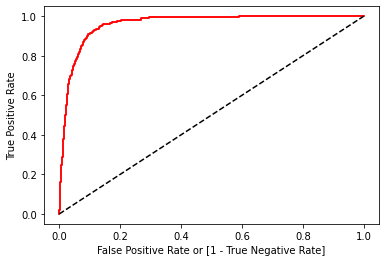

auc accuracy: 0.6268050016773205


In [ ]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)